In [2]:
import math
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rnd
import seaborn as sns
import scipy.stats as stats

from tqdm import tqdm
import statsmodels
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import TTestIndPower
from datetime import datetime, timedelta, date
from collections import namedtuple
from collections.abc import Iterable

import ipywidgets as widgets
from IPython.display import display, clear_output
import json

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore')
from libs.connections import anl, sogu_filter_has_events, sogu

import pandas as pd
import numpy as np

import warnings

from typing import Optional, List
from matplotlib.ticker import FuncFormatter
from scipy.stats import t, ttest_ind_from_stats
from scipy import stats
from statsmodels.stats.power import tt_ind_solve_power
from statsmodels.stats.multitest import fdrcorrection

from collections.abc import Iterable
from datetime import datetime, date, time
from itertools import repeat
from typing import Union 

start anl
anl


In [3]:
def binary_search(low, high, need_more_func):
    tolerance = 1e-4
    while high - low > tolerance:
        answer = (low + high) / 2
        if need_more_func(answer):
            low = answer
        else:
            high = answer
    return answer


def literal(value, datatype=None):
    """Format and quote literal for sql query. If value is a list then join elements using comma as a separator.

    Args:
        value: A value to format and quote.
        datatype (str, optional): Value data type. If None then value type is used. Defaults to None.

    Returns:
        str: A formatted and quoted literal.

    Example:
        >>> from libs.sql import literal
        >>> from datetime import datetime

        >>> print(f'''
                select id, receivd, status
                  from repetitors.ri_orders
                 where receivd >= { literal(datetime(2020, 5, 1)) }
                   and status in ({ literal([10, 20, 30]) })
            ''')
    """ 

    if isinstance(value, Iterable) and not isinstance(value, str):
        return ','.join(map(literal, value, repeat(datatype)))

    elif datatype in ['datetime_short', 'timestamp_short']:
        return literal(value.strftime('%Y-%m-%d %H:%M:%S'))

    elif (isinstance(value, datetime) and datatype is None) or datatype in ['datetime', 'timestamp']:
        return literal(value.strftime('%Y-%m-%d %H:%M:%S.%f'))

    elif (isinstance(value, date) and datatype is None) or datatype == 'date':
        return literal(value.strftime('%Y-%m-%d'))

    elif (isinstance(value, time) and datatype is None) or datatype == 'time':
        return literal(value.strftime('%H:%M:%S.%f'))

    elif (isinstance(value, str) and datatype is None) or datatype in ['str', 'string']:
        # Экранирование одинарных кавычек в строках
        escaped_value = value.replace("'", "''")
        return f"'{escaped_value}'"

    elif (isinstance(value, bool) and datatype is None) or datatype in ['bool', 'boolean']:
        return str(int(value))

    elif value is None:
        return 'NULL'
    
    else:
        return str(value)

# Зафиксируйте функции запросов к базам данных
sogu - продовый кликхаус <br>
anl - аналитический постгрес

In [4]:
"""
#def sogu_query_executor(query):
    # PUT YOUR FUNCTION HERE
    
#def anl_query_executor(query):
    # PUT YOUR FUNCTION HERE

sogu = sogu_query_executor
anl = anl_query_executor
""";
from libs.connections import anl, sogu
anl('select 1');
sogu('select 1');

# множественное сравнение
# в явном виде указывать режим: MDE или pvalue
# зафиксировать время взятия исторических данных по умолчанию за последнее время
# графики в динамике

# Технические функции

In [5]:
def binary_search(low, high, need_more_func):
    tolerance = 1e-4
    while high - low > tolerance:
        answer = (low + high) / 2
        if need_more_func(answer):
            low = answer
        else:
            high = answer
    return answer

from datetime import datetime, date, time
from itertools import repeat


def literal(value, datatype=None):
    """Format and quote literal for sql query. If value is a list then join elements using comma as a separator.

    Args:
        value: A value to format and quote.
        datatype (str, optional): Value data type. If None then value type is used. Defaults to None.

    Returns:
        str: A formatted and quoted literal.

    Example:
        >>> from libs.sql import literal
        >>> from datetime import datetime

        >>> print(f'''
                select id, receivd, status
                  from repetitors.ri_orders
                 where receivd >= { literal(datetime(2020, 5, 1)) }
                   and status in ({ literal([10, 20, 30]) })
            ''')
    """ 

    if isinstance(value, Iterable) and not isinstance(value, str):
        return ','.join(map(literal, value, repeat(datatype)))

    elif datatype in ['datetime_short', 'timestamp_short']:
        return literal(value.strftime('%Y-%m-%d %H:%M:%S'))

    elif (isinstance(value, datetime) and datatype is None) or datatype in ['datetime', 'timestamp']:
        return literal(value.strftime('%Y-%m-%d %H:%M:%S.%f'))

    elif (isinstance(value, date) and datatype is None) or datatype == 'date':
        return literal(value.strftime('%Y-%m-%d'))

    elif (isinstance(value, time) and datatype is None) or datatype == 'time':
        return literal(value.strftime('%H:%M:%S.%f'))

    elif (isinstance(value, str) and datatype is None) or datatype in ['str', 'string']:
        # Экранирование одинарных кавычек в строках
        escaped_value = value.replace("'", "''")
        return f"'{escaped_value}'"

    elif (isinstance(value, bool) and datatype is None) or datatype in ['bool', 'boolean']:
        return str(int(value))

    elif value is None:
        return 'NULL'
    
    else:
        return str(value)

In [12]:
sogu('''
    select 
        JSONExtractString(params, 'experiment') as experiment
        ,JSONExtractString(params, 'variant') as variant
        ,uniq(device_id)
        ,min(dt)
        ,max(dt)
    from sogu.events
    where toDate(dt) between '2025-09-10' and '2025-10-01'
        and event_name = 'experiments.hit'
        and experiment = 'download_app_motivators'
    group by experiment, variant
''')
#download_app_motivators bottom_banner top_banner

,experiment,variant,uniq(device_id),min(dt),max(dt)
0,download_app_motivators,bottom_banner,60890,2025-09-10 09:26:37.741000+00:00,2025-10-01 20:59:59.735000+00:00
1,download_app_motivators,top_banner,82246,2025-09-09 21:42:59.766000+00:00,2025-10-01 20:59:58.300000+00:00


# Банк состояний и банк метрик

In [13]:
class WHERE:
    """ 
        Cрез пользователей эксперимента
    """
    all = {
        'default_bot_filter': ''' device_id <> '' and ua_is_bot = 0 ''',
        'web': ''' platform in ('web', 'backend') ''',
        'web desktop': ''' platform in ('web', 'backend') and ua_is_mobile = 0 ''',
        'web mobile': ''' platform in ('web', 'backend') and ua_is_mobile = 1 ''',
        'app': ''' platform in ('ios', 'android', 'backend') '''
    }

    def __init__(self, name: str, database='clickhouse prod', table='sogu.events'):
        assert database=='clickhouse prod', f'Неподдерживаемая база данных {database}'
        assert table=='sogu.events', f'Неподдерживаемая таблица {table}'
        
        assert name in WHERE.all, f"Фильтр {name} не предусмотрен"
        
        self.where = WHERE.all[name]


    def __repr__(self):
        return f"WHERE({self.name})"


class STATE:
    """
        Состояние. Числитель или знаменатель метрики 
    """
    def set_database(self, database:str):
        if database == '':
            self.database = 'clickhouse prod'
        elif database in ('clickhouse prod', 'postgresql analytics'):
            self.database = database
        else:
            raise ValueError(f"Неподдерживаемая база данных {database}")
        

    def set_table(self, table:str):
        if self.database == 'clickhouse prod':
            if table == '':
                self.table = 'sogu.events'
            elif table == 'sogu.events':
                self.table = table
            else:
                raise ValueError(f"Неподдерживаемая таблица {table} для базы данных {self.database}")
        elif self.database == 'postgresql analytics':
            if table == '':
                self.table = 'analytics.mart_orders'
            elif table == 'analytics.mart_orders':
                self.table = table
            else:
                raise ValueError(f"Неподдерживаемая таблица {table} для базы данных {self.database}")
        else:
            raise ValueError(f"self.database == '{self.database}' выставлена неверно")


    def set_state(self, state_type:str, **kwargs:dict):
        if state_type == 'bare_sogu_event':
            event_name = kwargs['event_name']

            self.required_events = set([event_name])
            self.event_name = event_name
            self.where = f''' event_name = '{event_name}' '''

        elif state_type == 'parametered_sogu_event':
            required_events = kwargs['required_events']
            where = kwargs['where']

            self.required_events = set(required_events)
            self.where = where

        elif state_type == 'calculus_mart_orders':
            where = kwargs['where']
            
            self.required_events = set()
            self.column = where
            self.where = where 
            self.alias = self.name

        elif state_type == 'string_counter':
            self.required_events = set()
            self.column = " 1=1 "
            self.alias = self.name
            
        elif state_type == 'column_is_not_null':
            column = kwargs['column']
            self.column = f'{column} is not null'
            self.alias = self.name 
        
        elif state_type == 'column_value':
            column = kwargs['column']
            self.column = column

        elif state_type == 'experiments_hit':
            assert self.name.startswith("experiment_"), f"Назовите состояние {self.name} с префиксом 'experiment_', если тип состояния 'experiments_hit'"

            self.required_events = set(['experiments.hit',])
            self.experiment_name = kwargs['experiment_name']
            self.experiment_variants = kwargs['experiment_variants'] # ['orignial', 'top_header', 'floating_bottom_button', ]

        elif state_type == 'foreign_key':
            column = kwargs['column']
            where = kwargs['where']
            alias = kwargs['alias']
            required_events = kwargs['required_events']

            self.column = column
            self.where = where
            self.alias = alias
            self.required_events = set(required_events)

        elif state_type == 'many_states_or':
            states_list = kwargs['states_list']
            pass

        else:
            raise ValueError(f"Неподдерживаемый state_type {state_type}")
        self.state_type = state_type


    def __init__(self, name:str,
                state_type:str,
                **kwargs:dict):
        database = kwargs['database'] if 'database' in kwargs else ""
        table = kwargs['table'] if 'table' in kwargs else ""

        self.name = name
        self.required_events = set()
        self.set_database(database)
        self.set_table(table)
        self.set_state(state_type, **kwargs)


    def get_hit_where(self):
        if self.state_type == 'experiments_hit':
            return ''' event_name = 'experiments.hit' and JSONExtractString(params, 'experiment') = '{experiment_name}')'''
        if self.state_type == 'parametered_sogu_event':
            return self.where
        
        raise ValueError(f"При state_type='{self.state_type}' стейт не может быть хитом")


    def __repr__(self):
        return f"STATE({self.name})"

states_sogu = {
    'device_id': STATE('device_id', 'string_counter'),
    'main_pageview': STATE('main_pageview', 'bare_sogu_event', event_name='main.pageview'),
    'listing_pageview': STATE('listing_pageview', 'bare_sogu_event', event_name='listing.pageview'),
    'experience_pageview': STATE('experience_pageview', 'bare_sogu_event', event_name='experience.pageview'),
    'booking_pageview': STATE('booking_pageview', 'bare_sogu_event', event_name='booking.pageview'),

    'hit_download_app_motivators': STATE('hit_download_app_motivators', 'parametered_sogu_event', 
                                            required_events=['header:top_header:app_download', 'floating_bottom_button:app_download'],
                                            where =''' event_name in ('header:top_header:app_download.shown', 'floating_bottom_button:app_download.shown') ''',
                                        ),


    'download_app_motivators_listing': STATE('download_app_motivators_listing', 'parametered_sogu_event', 
            required_events=['header:top_header:app_download', 'floating_bottom_button:app_download'],
            where =''' event_name in ('header:top_header:app_download.shown', 'floating_bottom_button:app_download.shown') and JSONExtractString(params, 'page_type' = 'listing')''',),
    'download_app_motivators_main': STATE('download_app_motivators_main', 'parametered_sogu_event', 
            required_events=['header:top_header:app_download', 'floating_bottom_button:app_download'],
            where =''' event_name in ('header:top_header:app_download.shown', 'floating_bottom_button:app_download.shown') and JSONExtractString(params, 'page_type' = 'main')''',),
    'download_app_motivators_favorite': STATE('download_app_motivators_favorite', 'parametered_sogu_event', 
            required_events=['header:top_header:app_download', 'floating_bottom_button:app_download'],
            where =''' event_name in ('header:top_header:app_download.shown', 'floating_bottom_button:app_download.shown') and JSONExtractString(params, 'page_type' = 'favorite')''',),

    'download_app_motivators_click': STATE('download_app_motivators_click', 'parametered_sogu_event', 
                                            required_events=['header:top_header:app_download.click', 'floating_bottom_button:app_download.click'],
                                            where =''' event_name in ('header:top_header:app_download.click', 'floating_bottom_button:app_download.click') ''',
                                        ),
    

    'listing_filter_open__auto_listing_open_popup': STATE('listing_filter_open__auto_listing_open_popup', 'parametered_sogu_event', 
                                                          required_events=['listing:filter.open'], 
                                                          where=''' event_name = 'listing:filter.open' and JSONExtractString(params, 'filter_window_type') = 'auto_listing_open_popup' ''', 
                                                          ),
    'listing_filter_apply__auto_listing_open_popup': STATE('listing_filter_apply__auto_listing_open_popup', 'parametered_sogu_event', 
                                                          required_events=['listing:filter.apply'], 
                                                          where=''' event_name = 'listing:filter.apply' and JSONExtractString(params, 'filter_window_type') = 'auto_listing_open_popup' ''', 
                                                          ),
    'listing_filter_apply_changed__auto_listing_open_popup': STATE('listing_filter_apply_changed__auto_listing_open_popup', 'parametered_sogu_event', 
                                                          required_events=['listing:filter.apply'], 
                                                          where=''' event_name = 'listing:filter.apply' and JSONExtractString(params, 'filter_window_type') = 'auto_listing_open_popup' 
\t\tand (JSONExtractInt(params, 'persons_count') <> 1 or JSONExtractString(params, 'duration_interval') <> '[]' or JSONExtractString(params, 'start_time_interval') <> '[]') ''', 
                                                          ),

    'sogu_order_created': STATE('sogu_order_created', 'bare_sogu_event', event_name='booking:order-create.success',),
}

# states для связок sogu с другими таблицами. В основном, для связи созданных заказов с analitics.mart_orders
# как второй пример: experience_id для связи с витриной Э
states_foreign = {
    'foreign_key__order_id__order_created': STATE('foreign_key__order_id__order_created', 'foreign_key', column=''' JSONExtractString(params, 'order_id') ''', where=''' event_name='booking:order-create.success' ''', alias='order_id', required_events=['booking:order-create.success'],),
    'foreign_key__experience_id__experience_view': STATE('foreign_key__experience_id__experience_view', 'foreign_key', column=''' JSONExtractString(params, 'experience_id') ''', where=''' event_name='experience.pageview' ''', alias = 'experience_id', required_events=['experience.pageview'],),
}

# states для связок sogu с другими таблицами
states_postgresql_anal = {
    'anl_order': STATE('anl_order', 'string_counter', database='postgresql analytics',),
    'order_w_paid': STATE('order_w_paid', 'column_is_not_null', column='payment_date', database='postgresql analytics',),
    'order_w_paid_no_refund': STATE('order_w_paid_no_refund', 'calculus_mart_orders', where='payment_date is not null and money_refund_date is null', database='postgresql analytics',),
    'delta_hours_order_to_date_exact': STATE('delta_hours_order_to_date_exact', 'column_value', column='delta_hours_order_to_date_exact',),

    'experiment_ranking_rpv_new': STATE('experiment_ranking_rpv_new', 'experiments_hit', experiment_name='ranking_rpv_new', experiment_variants=['original','ranking_rpv', 'ranking_mab_new']),
}

# states для событий experiments.hit и постанализов sogu с другими таблицами
states_experiment = {
    # для каждого постанализа необходимо добавлять собыственный state
    'experiment_exp_listing_popup_expfmt_add': STATE('experiment_exp_listing_popup_expfmt_add', 'parametered_sogu_event', 
                                                          required_events=['listing:filter.open'], 
                                                          experiment_name='exp_listing_popup_expfmt_add',
                                                          experiment_variants=['orignial', 'exp_listing_popup_expfmt_add', ],
                                                          where=''' 
                                                          event_name = 'listing:filter.open' and JSONExtractString(params, 'filter_window_type') = 'auto_listing_open_popup' ''', 
                                                          ),
    'experiment_exp_listing_popup_expfmt_add_A': STATE('experiment_exp_listing_popup_expfmt_add', 'experiments_hit', 
                                                          required_events=['listing:filter.open'], 
                                                          experiment_name='exp_listing_popup_expfmt_add',
                                                          experiment_variants=['orignial', 'exp_listing_popup_expfmt_add', ],
                                                          where=''' 
                                                          event_name = 'listing:filter.open' and JSONExtractString(params, 'filter_window_type') = 'auto_listing_open_popup' ''', 
                                                          ),
}

states_all = states_sogu | states_foreign | states_postgresql_anal | states_experiment

class METRIC:
    def __init__(self, denominator_name, numerator_name, metric_type):
        assert denominator_name in states_all, "Знаменателя метрики нет в стейджах"
        assert numerator_name in states_all, "Числителя метрики нет в стейджах"
        assert metric_type in ('ratio', 'mean', 'user_based', 'binary'), "Укажите верный тип метрики"
        self.denominator = states_all[denominator_name]
        self.numerator = states_all[numerator_name]
        self.metric_type = metric_type


    def __repr__(self):
        return f"METRIC{(self.denominator.name, self.numerator.name, self.metric_type)}"
    

    def get_stages_set(self):
        return set([self.denominator, self.numerator])


metrics_all = {
    'Конверсия из девайса в просмотр главной': METRIC('device_id', 'main_pageview', 'binary'),
    'Конверсия из девайса в просмотр листинга': METRIC('device_id', 'listing_pageview', 'binary'),
    'Конверсия из девайса в открытую экскурсию': METRIC('device_id', 'experience_pageview', 'binary'),
    'Среднее количесто листингов на пользователя': METRIC('device_id', 'listing_pageview', 'mean'),

    'Конверсия из девайса в показ download_app_motivators': METRIC('device_id', 'hit_download_app_motivators', 'binary'),
    'Конверсия из показа download_app_motivators в клик': METRIC('hit_download_app_motivators', 'download_app_motivators_click', 'binary'),
    'Конверсия из показа download_app_motivators на листинге в клик': METRIC('download_app_motivators_listing', 'download_app_motivators_click', 'binary'),
    'Конверсия из показа download_app_motivators на главной в клик': METRIC('download_app_motivators_main', 'download_app_motivators_click', 'binary'),
    'Конверсия из показа download_app_motivators на избранном в клик': METRIC('download_app_motivators_favorite', 'download_app_motivators_click', 'binary'),

    'Конверсия из девайса в показ автоматического попапа с фильтрами на листинге': METRIC('device_id', 'listing_filter_open__auto_listing_open_popup', 'binary'),
    'Конверсия из девайса в применение фильтров на автоматическом попапе на листингах': METRIC('device_id', 'listing_filter_apply__auto_listing_open_popup', 'binary'),
    'Конверсия из девайса в применение не дефолтных фильтров на автоматическом попапе на листингах': METRIC('device_id', 'listing_filter_apply_changed__auto_listing_open_popup', 'binary'),

    'Конверсия из девайса в страницу букинга': METRIC('device_id', 'booking_pageview', 'binary'),
    'Конверсия из девайса в создание заказа': METRIC('device_id', 'sogu_order_created', 'binary'),

    'Конверсия из девайса в оплаченный заказ без возврата': METRIC('device_id', 'order_w_paid_no_refund', 'binary'),
    'Конверсия в оплаченный заказ без возврата из девайса с заходом на главную': METRIC('main_pageview', 'order_w_paid_no_refund', 'binary'),
    'Конверсия из заказа в оплаченный заказ без возврата': METRIC('anl_order', 'order_w_paid_no_refund', 'binary'),

    'Конверсия из заказа в оплату': METRIC('anl_order', 'order_w_paid', 'binary'), 
    'Часов между заказом и исполнением': METRIC('anl_order', 'delta_hours_order_to_date_exact', 'mean'),
    'Конверсия из листинга в оплаченный заказ': METRIC('listing_pageview', 'order_w_paid', 'binary'),
}

# Класс для работы с SOGU

In [ ]:
class SOGU_SCRIPT:
    '''
        Класс для формирования и запуска SQL запросов к sogu.events
        Принимает на вход config
        Использует глобальную переменную - функция sogu()
    '''
    def set_time(self, config):
        self.start_datetime = config['start_datetime']
        self.finish_datetime = config['finish_datetime']


    def set_metrics_and_states(self, config):
        self.states = set()
        self.metrics = set()
        print("config['metrics']", config['metrics'])
        for metric_name in config['metrics']:
            
            denominator = states_all[metrics_all[metric_name].denominator.name]
            numerator = states_all[metrics_all[metric_name].numerator.name]
            if denominator.database == 'clickhouse prod' and denominator.table == 'sogu.events':
                self.states.add(denominator)
            if numerator.database == 'clickhouse prod' and numerator.table == 'sogu.events':
                self.states.add(numerator)
            if denominator.database == 'clickhouse prod' and denominator.table == 'sogu.events' and numerator.database == 'clickhouse prod' and numerator.table == 'sogu.events':
                self.metrics.add(metrics_all[metric_name])
            #else:
            #    print('Пропущена метрика', metric_name)
            #    print(denominator.database, denominator.table)
            #    postgresql analytics analytics.mart_orders
            #    raise ValueError('Неподдерживаемая таблица')
        print("self.states", self.states)
        print("self.metrics", self.metrics)


    def set_where_base_part(self, config):
        where_base_part = config['where_base_part']
        
        where_dt = f'''where toDate(dt) between toDate('{self.start_datetime}') and toDate('{self.finish_datetime}')''' + \
f'''\n\t\tand dt between '{self.start_datetime}' and '{self.finish_datetime}' '''
        list_of_where = [where_dt, ] + [WHERE(new_filter).where for new_filter in where_base_part]
        self.where_base_part = """\n\t\tand""".join(list_of_where)  


    def set_where_hit_part(self, config):
        hit_metric = metrics_all[config['hit_metric_name']]
        hit_state = states_all[hit_metric.numerator.name]
        self.where_hit_part = hit_state.get_hit_where()


    def set_requier_events(self):
        self.requier_events = set()
        for state in self.states:
            self.requier_events |= state.required_events


    def set_states_select(self):
        select_list = []
        print("self.metrics", self.metrics)
        for metric in self.metrics:
            if metric.metric_type == 'binary':
                st = f'anyIf(1, {metric.numerator.where}) as "has_{metric.numerator.name}"'
                select_list.append(st)
            elif metric.metric_type == 'mean':
                st = f'countIf(1, {metric.numerator.where}) as "avg_{metric.numerator.name}"'
                select_list.append(st)
            else:
                print(metric, 'без состояния в sogu')
        self.states_select = ',' + '\n\t,'.join(select_list)
        print("self.states_select", self.states_select)
    

    def __init__(self, config):
        self.calculation_mode = config['calculation_mode']

        self.set_time(config)
        self.set_metrics_and_states(config)
        self.set_requier_events()
        self.set_states_select()

        self.set_where_base_part(config)
        self.set_where_hit_part(config)
        
    
    def get_base_device_id_query(self):
        print("self.states_select", self.states_select)
        return f""" 
    with hit_time as (
        select 
            device_id as hit_time_device_id
            ,min(dt) as min_dt
        from sogu.events
        {self.where_base_part}
        and {self.where_hit_part}

        group by device_id
    )
    select 
        device_id
        {self.states_select}
    from sogu.events
    
    inner join hit_time 
    on sogu.events.device_id = hit_time.hit_time_device_id

    {self.where_base_part}
    and event_name in ({literal(self.requier_events)})

    group by device_id
"""
    

    def get_foreign_key_query(self, foreign_key_state_name):
        foreign_key_state = states_all[foreign_key_state_name]
        query = f''' 
with hit_time as (
        select 
            device_id as hit_time_device_id
            ,min(dt) as min_dt
        from sogu.events
        {self.where_base_part}
        and {self.where_hit_part}

        group by device_id
    )

select distinct
    device_id
    ,{foreign_key_state.column}as {foreign_key_state.alias}
from sogu.events

inner join hit_time 
on sogu.events.device_id = hit_time.hit_time_device_id

{self.where_base_part}
\tand event_name in ({literal(foreign_key_state.required_events)})
'''
        return query
    

    def run_base_device_id_query(self, show=True):
        query = self.get_base_device_id_query()
        print("==="*20, 'Запущен sogu скрипт', "==="*20)
        for row in query.split('\n'):
            print(row)
        return sogu(query)
    

    def run_foreign_key_query(self, foreign_key_state_name, show=True):
        query = self.get_foreign_key_query(foreign_key_state_name)
        print("==="*20, 'Запущен sogu скрипт', "==="*20)
        for row in query.split('\n'):
            print(row)
        return sogu(query)

# Класс для работы с аналитическим PostgreSQL

In [70]:
class FOREIGN_TABLE:
    '''
        Класс для формирования и запуска SQL запросов к одной выбранной витрине в аналитическом PostgreSQL
        К примеру, analytics.mart_orders или analytics.mart_experience
        Принимает на вход результат работы из SOGU_SCRIPT.get_foreign_key_query()
        Использует глобальную переменную - функция anl()
    '''
    def set_keys_values(self, keys_values):
        self.keys_values = keys_values


    def set_metrics_and_states(self, config):
        self.states = set()
        self.metrics = set()
        for metric_name in config['metrics']:
            denominator = states_all[metrics_all[metric_name].denominator.name]
            numerator = states_all[metrics_all[metric_name].numerator.name]
            if denominator.database == self.database and denominator.table == self.table:
                self.states.add(denominator)
            if numerator.database == self.database and numerator.table == self.table:
                self.states.add(numerator)
            if denominator.database == self.database and denominator.table == self.table and numerator.database == self.database and numerator.table == self.table:
                self.metrics.add(metrics_all[metric_name])
        print("self.states", self.states)
        print("self.metics", self.metrics)

    
    def set_states_select(self):
        select_list = []
        for state in self.states:
            st = f'{state.column} as {state.alias}'
            select_list.append(st)
        self.states_select = ',' + '\n\t,'.join(select_list)


    def __init__(self, 
                 config,
                 key_values,
                 database:str='postgresql analytics', 
                 table:str='analytics.mart_orders',
                 key_column:str='order_id',
                 show=True,
        ):
        self.database = database
        self.table = table
        self.key_column = key_column
        assert len(self.key_values) > 0, f"Для таблицы {self.table} пришёл пустой массив"

        self.set_keys_values(key_values)
        self.set_metrics_and_states(config)
        self.set_states_select()


    def get_query(self):
        query = f'''
    select 
        {self.key_column}
        {self.states_select}
    from {self.table}
    where {self.key_column} in ({literal(self.keys_values)})
'''
        return query
    
    def run_query(self):
        if self.database == 'postgresql analytics':
            query = self.get_query()
            print("==="*20, 'Запущен скрипт к аналитическому постгресу', self.table, "==="*20)
            if show:
                for row in (query[:400] + "...)").split('\n'):
                    print(row)
            table = anl(query)
            table['order_id'] = table['order_id'].astype(str)
            return table
        raise f"База данных {self.database} пока не поддерживается"

# Класс для MDE

In [16]:
class MDE:
    METHOD_LIST = ('proportion_z_test', 'xi_2', '2 histograms', 'bootstrap', )
    def __init__(self, 
                 data: pd.DataFrame,
                 config: dict,
                 calculus_format: str = 'all_columns',
                 goal_metric: str = '',
                 metrics_columns: List[str] = [],
                 days_interval: int = np.nan, 
                 infinity: int = 1_000,
                 ):
        self.data = data 
        self.alpha = config['alpha']
        self.beta = config['beta']
        
        self.infinity = infinity
    
        if days_interval is np.nan:
            days_interval = (datetime.fromisoformat(config['finish_datetime']) - datetime.fromisoformat(config['start_datetime'])).days + 1
        self.days_interval = days_interval

        if not metrics_columns:
            for column in data.columns:
                if data[column].dtype in (int, float):
                    metrics_columns.append(column)
                    continue
                print('Столбец', column, "не участвует в расчёте mde")
        print('Для расчёта MDE используем столбцы')
        print(metrics_columns)
        self.metrics_columns = metrics_columns

        if not goal_metric:
            goal_metric = metrics_columns[0]
        print('Целевая метрика:', goal_metric)
        self.goal_metric = goal_metric
    

    def calculate_one_mde_conversion(self, n_a, n_b, p_a, test_type='two-sided', method:str='proportion_z_test') -> float:
        """
        Выдаёт одно значние: относительный mde для конверсии
        При данных в группе А n_a - размер группы А, p_a - конверсия в группе А.
        n_b - размер группы B
        """
        if method == 'proportion_z_test':
            z_critical = stats.norm.ppf(1 - self.alpha/(2 if test_type == 'two-sided' else 1))
            alternative = 'smaller' if test_type == 'one-sided' else 'two-sided'

            p_b = binary_search(
                p_a, 1,
                lambda p_b: stats.proportions_ztest([n_a*p_a, n_b*p_b], [n_a, n_b], alternative=alternative)[0] > z_critical
            )
            return p_b / p_a - 1
        
        elif method in MDE.METHOD_LIST:
            raise ValueError(f'Метод {method} пока не реализован')
        
        raise ValueError(f'Неподдерживаемй метод расчёта mde конверсии {method}. Выберите один из {self.method_list}')


    def calculate_list_mde_conversion(self, n_a_list:List[int], p_a, ratio:float=1.0, test_type='two-sided', method:str='proportion_z_test') -> List[float]:
        """
            ratio - во сколько раз тестовая группа больше контрольной
            n_a_list - массив количеств размеров выборок А
            p_a - конверсия в группе А
        """
        return [
            self.calculate_one_mde_conversion(n_a, int(n_a*ratio), p_a, test_type=test_type, method=method)
            for n_a in n_a_list]


    def calculate_one_mde_general(self, group_a:List[float], nobs1:int, ratio:float=1.0, test_type:str='two-sided', method:str='bootstrap' ) -> float: 
        """
            Выдаёт одно значние: относительный mde размера выбррки nobs1 для любой метрики
            group_a - исторические данные группы А для определения mean и std
            nobs1 - объём реальной группы А. (объём исторических данных обычно в два раза большое объёма настоящей выборки)
            ratio - во сколько раз тестовая группа больше контрольной

        """
        mean_a = np.mean(group_a)
        std_a = np.std(group_a)
        if std_a == 0:
            return 0

        if method == 'TTestIndPower':
            #print('TTestIndPower', mean_a, std_a, nobs1, )
            mde_std = TTestIndPower().solve_power(nobs1=nobs1, alpha=self.alpha, power=1-self.beta, ratio=ratio, alternative=test_type)
            return (mde_std * std_a) / mean_a
        
        elif method == 'bootstrap':
            def get_group_b_from_group_a(group_a:List[float], uplift:float) -> List[float]:
                # возможно, нужна более интеллектуальная трансформация
                group_b = np.array(group_a) * (1+uplift)
                return group_b
            
            def get_one_pvalue(group_a, group_b):
                """  
                    Расчитывает одно pvalue в симуляции
                """
                A = np.random.choice(group_a, size=nobs1)
                B = np.random.choice(group_b, size=int(nobs1*ratio))
                return stats.ttest_ind(A, B, equal_var=False, alternative=test_type)[1]

            def get_error_type2(uplift):
                """
                    Вероятность совершить ошибку II рода при данном uplift
                """
                group_b = get_group_b_from_group_a(group_a, uplift)
                pvalues = np.array([get_one_pvalue(group_a, group_b) for _ in range(self.infinity)])
                return (pvalues > self.alpha).mean()
            mde = binary_search(0, 0.8, need_more_func=lambda uplift: get_error_type2(uplift) > self.beta)

            def rnd_choice(M, size):
                return [np.mean(np.random.choice(M, size=size))
                        for _ in range(self.infinity)
                        ]

            plt.hist(rnd_choice(group_a, nobs1), color='green')
            plt.hist(rnd_choice(get_group_b_from_group_a(group_a, mde), int(nobs1*ratio)), color='red')
            return 


        assert 1==0, f'Введён неподдерживаемй метод расчёта mde конверсии {method}. Выберите один из {self.method_list}'
    
    def main_calculus(self, weeks_list:tuple=(1, 2, 3, 4, 5), method='TTestIndPower') -> tuple:
        metrics_list = self.data.columns
        result = pd.DataFrame({'metric': metrics_list, 
                               #'Наблюдений': [len(data[metric]) for metric in metrics_list],
                               
                               })
        nobs1_weeks = {}
        for week in weeks_list:
            nobs1 = int((7 * week / self.days_interval) * len(data))
            week_column_name = f'mde week{'s' if week > 1 else ''} {week}'
            nobs1_weeks[week_column_name] = f'{str(nobs1)} в одной группе'

            new_col = []
            for metric in metrics_list:
                #print('go calculate_one_mde_general', week, metric,)
                group_a = self.data[metric]
                mde_float = self.calculate_one_mde_general(group_a, nobs1, method=method)
                mde_string = f'{round(mde_float*100, 1)}%'
                #print(x)
                new_col.append(mde_string)
            
            result[week_column_name] = new_col

        print(nobs1_weeks)
        result['Бэйзлайн'] = [np.mean(data[metric]) for metric in metrics_list]
        return result.set_index('metric'), nobs1_weeks

"""
half_size = len(gr_main) // 2
data = gr_main.sample(n=half_size)
mde_object = MDE(data, config)
res, nobs1_weeks = mde_object.main_calculus()
res
""";

In [17]:
# необзятальная часть с переименовыванием стейджей в метрики
# TODO: занести в объект
pd.set_option('display.max_colwidth', None)
print(nobs1_weeks)
q = res.loc[['has_listing_filter_apply__auto_listing_open_popup', 'has_listing_filter_apply_changed__auto_listing_open_popup', 'has_experience_pageview', 'has_booking_pageview', 'has_sogu_order_created', 'order_w_paid', 'order_w_paid_no_refund']]
def find_metric_name_from_numerator_name(numerator_name):
    numerator_name = numerator_name.replace('has_', '').replace('avg_', '')
    for metric_name in config['metrics']:
        metric = metrics_all[metric_name]
        #print(metric_name, numerator_name, metric.numerator.name, numerator_name == metric.numerator.name)
        if numerator_name == metric.numerator.name:
            #print('Присвоить', metric_name)
            return metric_name
    return numerator_name
q = q.reset_index()
q['Метрика'] = q['metric'].apply(find_metric_name_from_numerator_name)
del q['metric']
q[['Метрика', 'mde week 1', 'mde weeks 2', 'mde weeks 3', 'mde weeks 4', 'mde weeks 5', 'Бэйзлайн']].set_index('Метрика')

NameError: name 'nobs1_weeks' is not defined

# Блок для постанализа

In [18]:
# переключение между mde режимом и режимом постанализа ещё в разработке
# симулируем разбиение на АБ группы на текущих данных. То есть запускаем постанализ на АА тест
gr_main['AB'] = rnd.choices(['A', 'B'], k=len(gr_main))

def calculus(df):
    """
        Расчёт всех метрик в датафрейме с pvalue
    """
    print("Соотношение uid A на B", len(df.query('AB == "A"')), len(df.query('AB == "B"')))

    metrics = list(set(df.columns) - set(['ab_variant_min', 'ab_variant_max', 'ab_variant', 'AB']))
    gr = df.groupby('AB').agg({m: list for m in metrics})

    gr.loc['pv'] = [round(stats.ttest_ind(gr[m]['A'], gr[m]['B']).pvalue, 3) for m in metrics]
    gr.loc['delta'] = round((gr.iloc[1].apply(lambda x: np.mean(x)) / gr.iloc[0].apply(lambda x: np.mean(x)) - 1)*100, 1)
    #gr.rename(columns={m: 'uid2'+m for m in metrics_uid2}
    #                 | {m: m+' per_uid' for m in metrics_per_uid}, inplace=True)

    T = gr.T
    T['delta'] = T['delta'].apply(lambda x: str(x)+'%' if x<0 else f'+{str(x)}%')
    T['A'] = T['A'].apply(lambda x: round(np.mean(x), 4))
    T['B'] = T['B'].apply(lambda x: round(np.mean(x), 4))
    return T[['A', 'B', 'delta', 'pv']]


res = calculus(gr_main)
res

NameError: name 'gr_main' is not defined

In [ ]:
#"""
def create_config_interface():
    # Создаем виджеты для основного режима
    calculation_mode = widgets.RadioButtons(
        options=['Дизайн', 'Постанализ'],
        value='Дизайн',
        description='Режим расчёта:',
        disabled=False
    )
    
    # Виджеты для постанализа (изначально скрыты)
    experiment_name = widgets.Text(
        value='download_app_motivators',
        placeholder='Введите название эксперимента',
        description='Эксперимент:',
        disabled=False
    )
    
    variant_a = widgets.Text(
        value='top_banner',
        placeholder='Вариант A',
        description='Variant A:',
        disabled=False
    )
    
    variant_b = widgets.Text(
        value='bottom_banner',
        placeholder='Вариант B',
        description='Variant B:',
        disabled=False
    )
    
    start_date = widgets.DatePicker(
        value=date(2025, 10, 12),
        description='Начало:',
        disabled=False
    )
    
    finish_date = widgets.DatePicker(
        value=date(2025, 10, 18),
        description='Конец:',
        disabled=False
    )
    
    # Мультивыбор из WHERE.all
    where_options = list(set(WHERE.all.keys()) - set(['default_bot_filter'])) if hasattr(WHERE, 'all') else []
    where_selector = widgets.SelectMultiple(
        options=where_options,
        value=['web'],
        rows=min(10, len(where_options)),
        description='WHERE условия:',
        disabled=False
    )

    # Мультивыбор из metrics_all
    metrics_options = list(metrics_all.keys()) if hasattr(metrics_all, 'keys') else []
    metrics_selector = widgets.SelectMultiple(
        options=metrics_options,
        value=['Конверсия из девайса в открытую экскурсию', 'Конверсия из девайса в страницу букинга', 'Конверсия из девайса в оплаченный заказ без возврата', 'Конверсия из заказа в оплату'],
        rows=min(10, len(metrics_options)),
        description='Метрики:',
        disabled=False,
        layout=widgets.Layout(width='900px')  # увеличенная в 3 раза ширина
    )
    
    # Одиночный выбор из metrics_all
    hit_metrics_options = list(metrics_all.keys()) if hasattr(metrics_all, 'keys') else []
    hit_metrics_selector = widgets.Dropdown(
        options=hit_metrics_options,
        value='Конверсия из девайса в показ download_app_motivators', #hit_metrics_options[0] if hit_metrics_options else None,  # выбираем первый элемент по умолчанию
        description='hit метрика - условие попадания в эксперимент. Если багов нет, эта метрика должна быть равна 1. К примеру, "Конверсия из девайса в показ листинга", если тест на листинге',
        disabled=False,
        layout=widgets.Layout(width='900px')  # увеличенная в 3 раза ширина
    )

    submit_button = widgets.Button(
        description='Применить настройки',
        button_style='success',
        tooltip='Сохранить выбранные параметры'
    )
    
    # Выходные данные
    output = widgets.Output()
    
    # Контейнер для виджетов постанализа
    postanalysis_container = widgets.VBox([
        widgets.HTML("<h4>Параметры постанализа:</h4>"),
        experiment_name,
        variant_a,
        variant_b
    ])
    
    # Функция для показа/скрытия виджетов постанализа
    def on_mode_change(change):
        if change['new'] == 'Постанализ':
            postanalysis_container.layout.display = 'block'
        else:
            postanalysis_container.layout.display = 'none'
    
    calculation_mode.observe(on_mode_change, names='value')
    postanalysis_container.layout.display = 'none'  # Изначально скрыто
    
    def on_submit_clicked(b):
        with output:
            clear_output()
            
            config = {
                'CALCULATION_MODE': calculation_mode.value,
                'START_DATE': start_date.value.isoformat(),
                'FINISH_DATE': finish_date.value.isoformat(),
                'SELECTED_WHERE': list(where_selector.value),
                'SELECTED_METRICS': list(metrics_selector.value),
                'HIT_METIRC': hit_metrics_selector.value,
            }
            
            if calculation_mode.value == 'Постанализ':
                config.update({
                    'EXPERIMENT_NAME': experiment_name.value,
                    'VARIANT_A': variant_a.value,
                    'VARIANT_B': variant_b.value
                })
                
                if not experiment_name.value:
                    print("Ошибка: Для постанализа необходимо указать название эксперимента!")
                    return
            
            global USER_CONFIG
            USER_CONFIG = config
            
            with open('user_config.json', 'w', encoding='utf-8') as f:
                json.dump(config, f, ensure_ascii=False, indent=2)
            
            print("✅ Конфигурация успешно сохранена!")
            print(f"Режим: {config['CALCULATION_MODE']}")
            print(f"Даты: {config['START_DATE']} - {config['FINISH_DATE']}")
            print(f"Выбрано WHERE условий: {len(config['SELECTED_WHERE'])}")
            print(f"Выбрано метрик: {len(config['SELECTED_METRICS'])}")
            
            if calculation_mode.value == 'Постанализ':
                print(f"Эксперимент: {config['EXPERIMENT_NAME']}")
    
    submit_button.on_click(on_submit_clicked)
    
    # Создаем основной интерфейс
    interface = widgets.VBox([
        widgets.HTML("<h2>Настройка параметров анализа</h2>"),
        calculation_mode,
        postanalysis_container,
        widgets.HTML("<h4>Период анализа:</h4>"),
        widgets.HBox([start_date, finish_date]),
        widgets.HTML("<h4>Выбор условий и метрик:</h4>"),
        widgets.HTML("<p><em>Добавить элемент: Command + клик (Mac) / Ctrl + клик (Windows)</em></p>"),
        where_selector,
        widgets.HTML(""" <p><em>hit метрика - условие попадания в эксперимент (treatment). Если багов нет, эта метрика должна быть равна 1. К примеру, "Конверсия из девайса в показ листинга", если тест на листинге</em></p> """),
        hit_metrics_selector,
        metrics_selector,
        submit_button,
        output
    ])
    
    return interface

# Создаем и отображаем интерфейс
interface = create_config_interface()
display(interface)
#''';
# download_app_motivators bottom_banner top_banner

In [27]:
try:
    with open('user_config.json', 'r', encoding='utf-8') as f:
        saver = json.load(f)
    
    # Используем параметры
    CALCULATION_MODE = saver['CALCULATION_MODE']
    START_DATE = saver['START_DATE']
    FINISH_DATE = saver['FINISH_DATE']
    SELECTED_WHERE = saver['SELECTED_WHERE']
    SELECTED_METRICS = saver['SELECTED_METRICS']
    HIT_METIRC = saver['HIT_METIRC']
    
    if CALCULATION_MODE == 'Постанализ':
        EXPERIMENT_NAME = saver['EXPERIMENT_NAME']
        VARIANT_A = saver['VARIANT_A']
        VARIANT_B = saver['VARIANT_B']
        VARIANTS = {VARIANT_A: 'A', VARIANT_B: 'B'}
    
    print("Параметры загружены успешно!")
    print(CALCULATION_MODE, EXPERIMENT_NAME)
    print(START_DATE, FINISH_DATE)
    print(f"Выбранные WHERE: {SELECTED_WHERE}")
    print(f"Выбранные метрики: {SELECTED_METRICS}")
    print(f"HIT_METIRC {HIT_METIRC}")
    
except FileNotFoundError:
    print("Сначала настройте параметры в веб-интерфейсе")

Параметры загружены успешно!
Постанализ download_app_motivators
2025-10-12 2025-10-18
Выбранные WHERE: ['web']
Выбранные метрики: ['Конверсия из девайса в открытую экскурсию', 'Конверсия из девайса в показ download_app_motivators', 'Конверсия из показа download_app_motivators в клик', 'Конверсия из показа download_app_motivators на листинге в клик', 'Конверсия из показа download_app_motivators на главной в клик', 'Конверсия из показа download_app_motivators на избранном в клик', 'Конверсия из девайса в страницу букинга', 'Конверсия из девайса в оплаченный заказ без возврата', 'Конверсия из заказа в оплату']
HIT_METIRC Конверсия из девайса в показ download_app_motivators


In [28]:
saver

{'CALCULATION_MODE': 'Постанализ',
 'START_DATE': '2025-10-12',
 'FINISH_DATE': '2025-10-18',
 'SELECTED_WHERE': ['web'],
 'SELECTED_METRICS': ['Конверсия из девайса в открытую экскурсию',
  'Конверсия из девайса в показ download_app_motivators',
  'Конверсия из показа download_app_motivators в клик',
  'Конверсия из показа download_app_motivators на листинге в клик',
  'Конверсия из показа download_app_motivators на главной в клик',
  'Конверсия из показа download_app_motivators на избранном в клик',
  'Конверсия из девайса в страницу букинга',
  'Конверсия из девайса в оплаченный заказ без возврата',
  'Конверсия из заказа в оплату'],
 'HIT_METIRC': 'Конверсия из девайса в показ download_app_motivators',
 'EXPERIMENT_NAME': 'download_app_motivators',
 'VARIANT_A': 'top_banner',
 'VARIANT_B': 'bottom_banner'}

In [51]:
config = {
    'calculation_mode': CALCULATION_MODE,
    'experiment_name': EXPERIMENT_NAME,
    'variants': VARIANTS,

    'start_date': START_DATE,
    'finish_date': FINISH_DATE,
    'start_datetime': START_DATE,
    'finish_datetime': FINISH_DATE,

    'n_groups': len(VARIANTS),
    'split_size': tuple([1/len(VARIANTS) for variant in VARIANTS]),
    'alpha': 0.05,
    'beta': 0.20,

    'hit_metric_name': HIT_METIRC, # treatment
    
    'where_base_part': list(set(['default_bot_filter']) | set(SELECTED_WHERE)),

    'goal_metric': 'Конверсия из девайса в страницу букинга',

    'metrics': SELECTED_METRICS,
}

config

{'calculation_mode': 'Постанализ',
 'experiment_name': 'download_app_motivators',
 'variants': {'top_banner': 'A', 'bottom_banner': 'B'},
 'start_date': '2025-10-12',
 'finish_date': '2025-10-18',
 'start_datetime': '2025-10-12',
 'finish_datetime': '2025-10-18',
 'n_groups': 2,
 'split_size': (0.5, 0.5),
 'alpha': 0.05,
 'beta': 0.2,
 'hit_metric_name': 'Конверсия из девайса в показ download_app_motivators',
 'where_base_part': ['web', 'default_bot_filter'],
 'goal_metric': 'Конверсия из девайса в страницу букинга',
 'metrics': ['Конверсия из девайса в открытую экскурсию',
  'Конверсия из девайса в показ download_app_motivators',
  'Конверсия из показа download_app_motivators в клик',
  'Конверсия из показа download_app_motivators на листинге в клик',
  'Конверсия из показа download_app_motivators на главной в клик',
  'Конверсия из показа download_app_motivators на избранном в клик',
  'Конверсия из девайса в страницу букинга',
  'Конверсия из девайса в оплаченный заказ без возврата'

In [31]:
# переключение между mde режимом и режимом постанализа ещё в разработке
# симулируем разбиение на АБ группы на текущих данных. То есть запускаем постанализ на АА тест
def calculus(df):
    """
        Расчёт всех метрик в датафрейме с pvalue
    """
    print("Соотношение uid A на B", len(df.query('AB == "A"')), len(df.query('AB == "B"')))

    metrics = list(set(df.columns) - set(['ab_variant_min', 'ab_variant_max', 'ab_variant', 'AB']))
    gr = df.groupby('AB').agg({m: list for m in metrics})

    gr.loc['pv'] = [round(stats.ttest_ind(gr[m]['A'], gr[m]['B']).pvalue, 3) for m in metrics]
    gr.loc['delta'] = round((gr.iloc[1].apply(lambda x: np.mean(x)) / gr.iloc[0].apply(lambda x: np.mean(x)) - 1)*100, 1)
    #gr.rename(columns={m: 'uid2'+m for m in metrics_uid2}
    #                 | {m: m+' per_uid' for m in metrics_per_uid}, inplace=True)

    T = gr.T
    T['delta'] = T['delta'].apply(lambda x: str(x)+'%' if x<0 else f'+{str(x)}%')
    T['A'] = T['A'].apply(lambda x: round(np.mean(x), 4))
    T['B'] = T['B'].apply(lambda x: round(np.mean(x), 4))
    return T[['A', 'B', 'delta', 'pv']]


In [60]:
config

{'calculation_mode': 'Постанализ',
 'experiment_name': 'download_app_motivators',
 'variants': {'top_banner': 'A', 'bottom_banner': 'B'},
 'start_date': '2025-10-12',
 'finish_date': '2025-10-18',
 'start_datetime': '2025-10-12',
 'finish_datetime': '2025-10-18',
 'n_groups': 2,
 'split_size': (0.5, 0.5),
 'alpha': 0.05,
 'beta': 0.2,
 'hit_metric_name': 'Конверсия из девайса в показ download_app_motivators',
 'where_base_part': ['web', 'default_bot_filter'],
 'goal_metric': 'Конверсия из девайса в страницу букинга',
 'metrics': ['Конверсия из девайса в открытую экскурсию',
  'Конверсия из девайса в показ download_app_motivators',
  'Конверсия из показа download_app_motivators в клик',
  'Конверсия из показа download_app_motivators на листинге в клик',
  'Конверсия из показа download_app_motivators на главной в клик',
  'Конверсия из показа download_app_motivators на избранном в клик',
  'Конверсия из девайса в страницу букинга',
  'Конверсия из девайса в оплаченный заказ без возврата'

# Исполнение

In [68]:
def run_main(config, show=False):
    sogu_script = SOGU_SCRIPT(config)

    devices = sogu_script.run_base_device_id_query()
    if show:
        print("len(devices)", len(devices))
        display(devices.head(2))

    ###
    foreign_order_id_table = sogu_script.run_foreign_key_query("foreign_key__order_id__order_created")
    if show:
        print("len(foreign_order_id_table)", len(foreign_order_id_table))
        display(foreign_order_id_table.head(2))

    ###
    mart_orders = FOREIGN_TABLE(config, foreign_order_id_table['order_id'])
    mart_orders_table = mart_orders.run_query()
    if show:
        print("len(mart_orders_table)", len(mart_orders_table))
        display(mart_orders_table.head(3))

    ###
    main = devices \
        .merge(foreign_order_id_table, how='left', on='device_id') \
        .merge(mart_orders_table, how='left', on='order_id') \
        .fillna(0)
    if show:
        print('len(main)', len(main))
        display(main.head(2))


    columns_for_max = set(main.columns) - set(['device_id', 'order_id'])
    columns_for_mean = set() # на будущее
    gr_main = main.groupby('device_id') \
            .agg({col: 'max' for col in columns_for_max}
                | {col: 'mean' for col in columns_for_max}
                )
    if show:
        print("len(gr_main)", len(gr_main))
        display(gr_main.head(2))

    return {
        'devices': devices,
        'foreign_order_id_table': foreign_order_id_table,
        'mart_orders': mart_orders,
        'main': main,
        'gr_main': gr_main,
        'calc': calc,
    }



res = run_main(config)
devices = res['devices']
gr_main = res['gr_main']
calc = res['calc']

config['metrics'] ['Конверсия из девайса в открытую экскурсию', 'Конверсия из девайса в показ download_app_motivators', 'Конверсия из показа download_app_motivators в клик', 'Конверсия из показа download_app_motivators на листинге в клик', 'Конверсия из показа download_app_motivators на главной в клик', 'Конверсия из показа download_app_motivators на избранном в клик', 'Конверсия из девайса в страницу букинга', 'Конверсия из девайса в оплаченный заказ без возврата', 'Конверсия из заказа в оплату']
self.states {STATE(download_app_motivators_listing), STATE(download_app_motivators_click), STATE(download_app_motivators_favorite), STATE(device_id), STATE(hit_download_app_motivators), STATE(experience_pageview), STATE(download_app_motivators_main), STATE(booking_pageview)}
self.metrics {METRIC('download_app_motivators_favorite', 'download_app_motivators_click', 'binary'), METRIC('device_id', 'booking_pageview', 'binary'), METRIC('hit_download_app_motivators', 'download_app_motivators_click'

AttributeError: 'FOREIGN_TABLE' object has no attribute 'key_values'

In [14]:
vx = ['2025-10-26', '2025-10-27', '2025-10-28']
vy = []
for finish_datetime in vx:
    config['start_datetime'] = '2025-10-28'
    config['finish_datetime'] = finish_datetime
    res = run_main(config)
    calc = res['calc']
    A, B, delta, pv = calc.loc['has_sogu_order_created']
    vy.append({'A': A, 'B': B, 'delta': delta, 'pv': pv})

KeyError: 'calculation_mode'

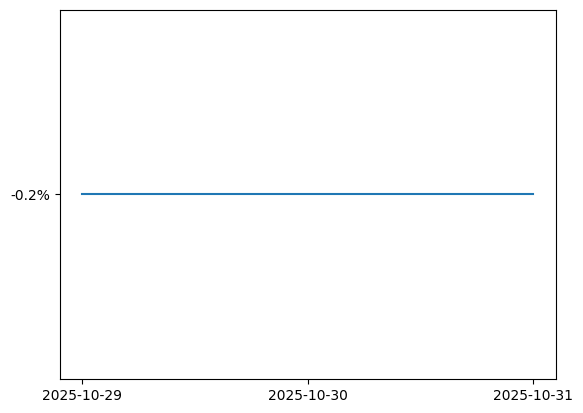

In [ ]:
plt.plot(vx, [e['delta'] for e in vy])